# Fuzzy C means Algorithm implementation

In [1]:
import numpy as np
import random as random
import copy as copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser
import datetime
import time
sns.set_style('whitegrid')
%matplotlib inline

In [47]:
global Epsilon
Epsilon = 0.0001

In [48]:
""" 
cette fonction retourne un vecteur de valeurs aléatoires telles que la somme du vecteur = 1

"""
def randomise_line(nb_cluster):
    interval_min = 0
    interval_max = 1
    proba_stack  = 0 
    row          = []
    for i in range(0,nb_cluster-1):
        proba    = random.uniform(interval_min,interval_max)
        row.append(proba)
        proba_stack += proba
        interval_max -= proba
    row.append(1-proba_stack)
    
    return row
        

In [49]:
""" 
cette fonction retourne un init de la table de degre d'appartenance selon le nb de xi & de cluster voulus

"""
def init_u(nrow,nb_cluster):
    U = []
    for i in range(0,nrow):
        col = randomise_line(nb_cluster)
        U.append(col)
    return U   

In [57]:
def is_done(U,U_old,epsilon):
    #print(len(U))
    for row in range(0,len(U)):
        for col in range(0,len(U[0])):
             if U[row][col] - U_old[row][col] > epsilon:
                return False
    return True

In [50]:
""" 
pour chaque variable de notre tuple, on calcule sa distance par rapport aux variables des centroïdes choisis

"""
def compute_euclidian_dist(point,center):
    stack = 0.0
    if len(point) != len(center):
        return -1
    
    for i in range(0,len(point)):
        stack +=  (point[i] - center[i]) ** 2
    return (stack ** 1/2)

In [51]:
"""
pour chaque j cluster, on doit avoir un centroid
pour avoir un centroïde , on prend une ligne, on itere sur toutes les colonnes 

"""
def get_cluster_centers(U,data,nb_cluster,m=2):
    global_centroids = []
    
    
    for j in range(0,nb_cluster): # pour tous les clusters
        curr_centroids = []
        for k in range(0,len(data[0])):# pour toutes les colonnes
            
            numerateur   = 0.0
            denominateur = 0.0
            
            for i in range(0,len(data)): # pour toutes les lignes
                
                numerateur += (U[i][j]**m)*data[i][k]
                denominateur += (U[i][j]**m)
            
            curr_centroids.append(numerateur/denominateur)
            
        global_centroids.append(curr_centroids)
    
    return global_centroids
                
            

In [52]:
'''
calcul une distance entre un centroïde et un point. en considerant toutes les variables 

'''
def get_dist_matrix(data,C):
    distance_matrix = []
    for i in range(0,len(data)):
        curr = []
        for j in range(0,len(C)):
            euc_dist = compute_euclidian_dist(data[i],C[j])
            curr.append(euc_dist)
            
        distance_matrix.append(curr)
    return distance_matrix

In [53]:
'''
permet de mettre à jour la table d'appartenance

'''
def update_U(U,distance_matrix,data,m):
    nb_cluster = len(U[0])
    nb_rows = len(data)
    
    for j in range(0, nb_cluster):
        
        for i in range(0, nb_rows):
            dummy = 0.0
            for k in range(0,nb_cluster):

                dummy += ((distance_matrix[i][j]/ distance_matrix[i][k])**(2/(m-1)))
            
            U[i][j] = 1 / dummy
    return U

In [54]:
'''
Permet de lancer l'algorithme avec l'enchainement des fonctions nécessaires pour finalement 
retourner la table d'appartenance finale

'''
def fuzzy(U,data,nb_cluster,m):
    
    U     = init_u(len(data),nb_cluster)
    maxit = 0
    
    while True :
        maxit +=1
        U_old = copy.deepcopy(U)
        C = get_cluster_centers(U,data,nb_cluster,m)
        dist_matrix = get_dist_matrix(data,C)
        update_U(U,dist_matrix,mydata,m)
        print(maxit)
        if is_done(U,U_old,0.003):
            return U
        elif maxit == 10000:
            print("TOO MUCH ITERATIONS")
            return U

In [55]:
'''
Permet de transformer U en table d'appartenance binaire 1 ou 0
'''
def normalize_U (U):
    for row in range(len(U_new)):
        treshhold = max(U_new[row])
        for col in range(len(U_new[0])):
            if U_new[row][col] == treshhold:
                U_new[row][col] = 1
            else:
                U_new[row][col] = 0
    return U 

In [218]:
"""
this is the main 
"""

'\nthis is the main \n'

In [174]:
""" GENERATING DATA """
centers = [[4, 2],
           [1, 7],
           [5, 6]]
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(50) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(50) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(50) * i))
mydata = []
for i in range(0,len(xpts)):
    c = []
    c.append(xpts[i])
    c.append(ypts[i])
    mydata.append(c)

# 1) Normalized FUZZY 

In [ ]:
U = []
U_new = fuzzy(U,mydata,3,2)
normalize_U (U_new)

In [199]:
names_x = ["x"+str(i+1) for i in range(len(mydata[0]))]
df_data = pd.DataFrame(mydata,columns=names_x)

In [201]:
def get_cluster_labels(U):
    labels = []
    for i in range(len(U)):
        for j in range(len(U[0])):
            if U[i][j] == 1 :
                labels.append("C"+str(j))
                
    return labels

In [206]:
#f_concat = pd.concat([df_data.reset_index(drop=True)],axis=1)

In [207]:
df_data["Cluster"] = get_cluster_labels(U_new)

In [215]:
df_one   = df_data[df_data.Cluster == "C0"]
df_two   = df_data[df_data.Cluster == "C1"]
df_three = df_data[df_data.Cluster == "C2"]

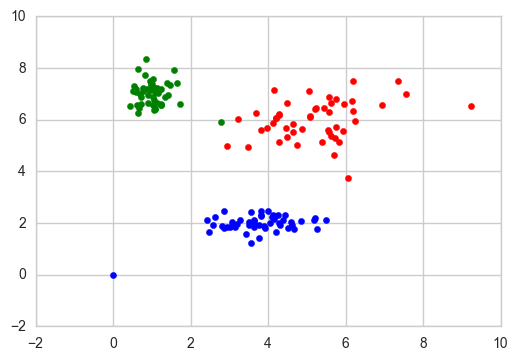

In [217]:
fig, ax = plt.subplots()
ax.scatter(df_one.x1,df_one.x2,     color='r')
ax.scatter(df_two.x1,df_two.x2,     color='g')
ax.scatter(df_three.x1,df_three.x2, color='b')

# 2)  FUZZY C MEANS DATA VIZ 

In [229]:
U = []
U_new = fuzzy(U,mydata,3,6)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [289]:
def ecarts_respectifs(U):
    matrice_ecarts = []
    for i in range(len(U)):
        vecteur_ecarts = []
        for j in range(len(U[0])):
            
            ecart = 0
            for k in range(len(U[0])):
                if j != k :
                    ecart += (U[i][j]-U[i][k])**2
                
            vecteur_ecarts.append(ecart**1/2)
            
        matrice_ecarts.append(vecteur_ecarts)
    return matrice_ecarts            

In [290]:
def moyenne_des_ecarts(U):
    return list(map(lambda x : sum(x)/len(x), ecarts_respectifs(U_new)))

In [310]:
np.max(moyenne_des_ecarts(U_new))

0.53499515586900082

In [326]:
def get_cluster_labels_generalized(moyenne_des_ecarts):
    labels = []
    for moyenne in moyenne_des_ecarts:
        if moyenne < 0.05:
            labels.append("C")
        else:
            labels.append("X")
    
    return labels

In [327]:
names_x = ["x"+str(i+1) for i in range(len(mydata[0]))]
df_data = pd.DataFrame(mydata,columns=names_x)
df_data["Cluster"] = get_cluster_labels_generalized(moyenne_des_ecarts(U_new))

In [328]:
df_data.Cluster.value_counts()

X    139
C     12
Name: Cluster, dtype: int64

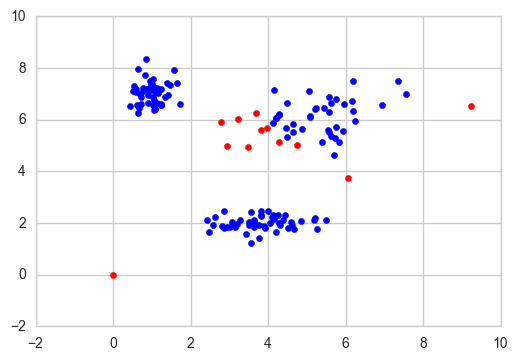

In [329]:
df_one   = df_data[df_data.Cluster == "X"]
df_two   = df_data[df_data.Cluster == "C"]
fig, ax = plt.subplots()
ax.scatter(df_one.x1,df_one.x2,     color='b')
ax.scatter(df_two.x1,df_two.x2,     color='r')


# 3) DATASET assurance

In [3]:
''' getting the actual age, converts it from time to seconds'''
def returnSeconds (x):
    try :
        time_now = datetime.datetime.now()
        t = (time_converter(x))
        diff = time_now  - t 
        return diff.total_seconds()
    except :
        return "NaN"

''' time converter function'''
def time_converter(x):
    import datetime
    try   :     return datetime.datetime.strptime(x,"%d/%m/%Y")
    except :
        return x

In [4]:
df = pd.read_csv("ModelPointRentes.csv", sep=";",encoding="latin-1")

In [5]:
for col in df.columns:
    nb_nuls = df[col].isnull().sum()
    pct_nul = nb_nuls / float(df.shape[0])
    if pct_nul > 0.1:
        print (col, ":", nb_nuls , "soit %.2f"%  pct_nul, "%")

DateNaissanceY : 8556 soit 0.85 %
Unnamed: 22 : 10032 soit 1.00 %


In [6]:
df = df.drop("Unnamed: 22"   ,axis=1)
df = df.drop("DateNaissanceY",axis=1)

In [7]:
df.DateNaissanceX = df.DateNaissanceX.apply(lambda x : returnSeconds(x))

In [8]:
mask = df.DateNaissanceX!='NaN'

In [9]:
final_df = df[mask]

In [10]:
final_df.DateNaissanceX = final_df.DateNaissanceX.astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
'''transforming df to list of lists'''

In [45]:
mydata = final_df.values.tolist()

In [58]:
U = []
U_new = fuzzy(U,mydata,4,2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


# Fuzzy C-Means Clustering

FCM methode de clustering qui permet de classifier une variable donnée dans deux ou plusieurs clusters

Developpé en 73 par Dunn et améliorer  BEZDEK en 81

souvent utilisé dans la classification de patterns ( exemple google )

FORMULE MATHMEATIQUE ...

m >= 1
u(ij) degrée d'appartenance de xi dans le cluster j,
xi - cj : norme
xi variable
cj variable prise en compte en tant que centroïde


le partitionnement fuzzy est réalisé à l'aide d'une optimisation itérative de la fonction objective
qu'on a vu au debut .
En mettant à jour la coeff d'appartenance U(ij) & le centre des cluster Cj
en utilsant les formules suivantes :
Uij = ..;
Cj = ...